## K-Means Clustering on Credit Card Dataset

In [6]:
import pandas as pd

cc_path = r"C:\Users\himan\OneDrive\Documents\Study Docs\Python VS Code\ML From Scratch\Datasets\clustering credit card dataset\CC GENERAL.csv"
credit_card_df = pd.read_csv(cc_path)

credit_card_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
# scaled_data

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

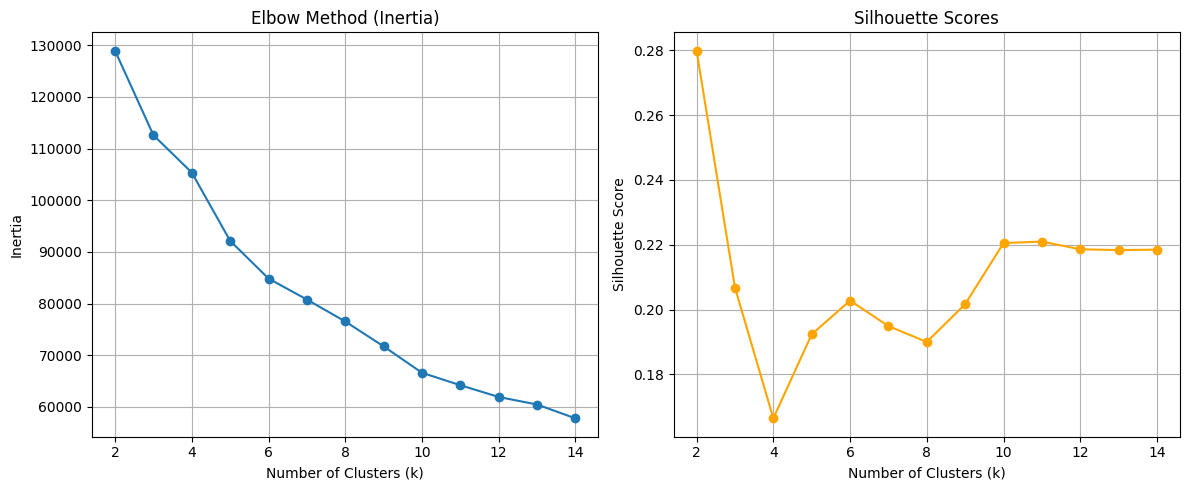

The optimal number of clusters is 2.


In [14]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
# file_path = "/path/to/CC GENERAL.csv"  # Replace with your actual path
data = pd.read_csv(cc_path)

# Step 2: Data preprocessing
# Drop CUST_ID as it's not relevant for clustering
data = data.drop(columns=["CUST_ID"])

# Handle missing values by imputing with the column mean
data = data.fillna(data.mean())

# Scale the data for clustering
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Run K-Means for different values of k and evaluate
inertia = []
silhouette_scores = []
k_values = range(2, 15)  # Test for k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Append inertia (sum of squared distances to centroids)
    inertia.append(kmeans.inertia_)

    # Compute silhouette score (only for k > 1)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Step 4: Visualize the results
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker="o", color="orange")
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: Select the best k based on the visualizations
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is {best_k}.")

In [40]:
centroids = np.array([[0, 0], [2, 2]])  # shape: (2, 2)


print(f" {centroids} \n ***************")

centroids = centroids[:, np.newaxis, :]  # shape: (2, 1, 2)
print(centroids)


def another_example():
    print("\n\nAnother example with different dimensions:")
    # 3 points, 3 features, 2 centroids
    X = np.array(
        [[1, 1, 1], [4, 4, 4], [0, 0, 0]]  # point 1  # point 2  # point 3
    )  # shape: (3, 3)

    centroids = np.array(
        [[0, 0, 0], [5, 5, 5]]  # centroid 1  # centroid 2
    )  # shape: (2, 3)

    print("Points X (shape: {}):\n{}".format(X.shape, X))
    print("\nCentroids (shape: {}):\n{}".format(centroids.shape, centroids))

    def _euclidean_distance(x1: np.ndarray, x2: np.ndarray) -> float:
        return np.sum((x1 - x2) ** 2, axis=1) ** (1 / 2)

    # Calculate all at once
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    distances2 = [_euclidean_distance(X, centroid) for centroid in centroids]
    labels = np.argmin(distances, axis=0)

    print("\nDistances (shape: {}):\n{}".format(distances.shape, distances))
    print(f"distanc es = {distances2}")
    print("\nLabels (shape: {}):\n{}".format(labels.shape, labels))

    # # Show assignments
    # print("\nFinal clustering:")
    # for point, label in zip(X, labels):
    #     print(f"Point {point} -> Cluster {label}")


another_example()

 [[0 0]
 [2 2]] 
 ***************
[[[0 0]]

 [[2 2]]]


Another example with different dimensions:
Points X (shape: (3, 3)):
[[1 1 1]
 [4 4 4]
 [0 0 0]]

Centroids (shape: (2, 3)):
[[0 0 0]
 [5 5 5]]

Distances (shape: (2, 3)):
[[1.73205081 6.92820323 0.        ]
 [6.92820323 1.73205081 8.66025404]]
distanc es = [array([1.73205081, 6.92820323, 0.        ]), array([6.92820323, 1.73205081, 8.66025404])]

Labels (shape: (3,)):
[0 1 0]


In [41]:
import numpy as np


def explain_centroid_subtraction():
    # Create sample data
    X = np.array(
        [[1, 1], [2, 2], [8, 8], [9, 9]]  # point 0  # point 1  # point 2  # point 3
    )

    centroids = np.array([[0, 0], [7, 7]])  # centroid 0  # centroid 1

    # Let's say these are our cluster assignments
    labels = np.array([0, 0, 1, 1])
    # points 0,1 belong to centroid 0
    # points 2,3 belong to centroid 1

    print("Data:")
    print("X shape:", X.shape)
    print("X:\n", X)
    print("\nCentroids shape:", centroids.shape)
    print("Centroids:\n", centroids)
    print("\nLabels:", labels)

    print("\nStep 1: centroids[labels]")
    # This creates an array where each point's assigned centroid is repeated
    assigned_centroids = centroids[labels]
    print("Shape:", assigned_centroids.shape)
    print("Values:\n", assigned_centroids)
    print("\nWhat happened:")
    for i, (point, label, assigned_centroid) in enumerate(
        zip(X, labels, assigned_centroids)
    ):
        print(
            f"Point {i}: {point} (label {label}) -> Assigned centroid: {assigned_centroid}"
        )

    print("\nStep 2: X - centroids[labels]")
    differences = X - assigned_centroids
    print("Shape:", differences.shape)
    print("Values:\n", differences)
    print("\nWhat happened:")
    for i, (point, assigned_centroid, diff) in enumerate(
        zip(X, assigned_centroids, differences)
    ):
        print(f"Point {i}: {point} - {assigned_centroid} = {diff}")

    # Compare with filtering approach
    print("\nIf we had filtered X by labels:")
    for label in range(len(centroids)):
        cluster_points = X[labels == label]
        print(f"\nCluster {label}:")
        print("Points:", cluster_points)
        # This would require separate calculations for each cluster


explain_centroid_subtraction()


def compare_approaches():
    """Compare current approach vs filtering approach"""
    X = np.array(
        [[1, 1], [2, 2], [8, 8], [9, 9]]  # point 0  # point 1  # point 2  # point 3
    )

    centroids = np.array([[0, 0], [7, 7]])  # centroid 0  # centroid 1

    labels = np.array([0, 0, 1, 1])

    print("\nComparing approaches:")
    print("=" * 50)

    # Current approach (vectorized)
    print("Current approach (vectorized):")
    differences = X - centroids[labels]
    inertia1 = np.sum(differences**2)
    print("Differences shape:", differences.shape)
    print("Differences:\n", differences)
    print("Inertia:", inertia1)

    # Filtering approach (by cluster)
    print("\nFiltering approach (by cluster):")
    inertia2 = 0
    for label in range(len(centroids)):
        cluster_points = X[labels == label]
        cluster_diffs = cluster_points - centroids[label]
        cluster_inertia = np.sum(cluster_diffs**2)
        inertia2 += cluster_inertia

        print(f"\nCluster {label}:")
        print("Points:\n", cluster_points)
        print("Differences:\n", cluster_diffs)
        print("Cluster inertia:", cluster_inertia)

    print("\nTotal inertia:", inertia2)
    print("\nBoth approaches equal:", np.allclose(inertia1, inertia2))


compare_approaches()


def visualize_matching():
    """Visualize how points are matched with their centroids"""
    X = np.array(
        [[1, 1], [2, 2], [8, 8], [9, 9]]  # point 0  # point 1  # point 2  # point 3
    )

    centroids = np.array([[0, 0], [7, 7]])  # centroid 0  # centroid 1

    labels = np.array([0, 0, 1, 1])

    print("\nPoint-Centroid Matching:")
    print("=" * 50)

    # Show original arrays
    print("X array:")
    print("[")
    for i, point in enumerate(X):
        print(f"  {point}  # point {i}")
    print("]")

    print("\ncentroids array:")
    print("[")
    for i, centroid in enumerate(centroids):
        print(f"  {centroid}  # centroid {i}")
    print("]")

    print("\nAfter centroids[labels]:")
    assigned = centroids[labels]
    print("[")
    for i, (point, centroid) in enumerate(zip(X, assigned)):
        print(f"  {centroid}  # centroid for point {i}")
    print("]")

    print("\nThis creates paired subtraction:")
    for i, (point, centroid) in enumerate(zip(X, assigned)):
        print(f"Point {i}: {point} - {centroid} = {point - centroid}")


visualize_matching()

Data:
X shape: (4, 2)
X:
 [[1 1]
 [2 2]
 [8 8]
 [9 9]]

Centroids shape: (2, 2)
Centroids:
 [[0 0]
 [7 7]]

Labels: [0 0 1 1]

Step 1: centroids[labels]
Shape: (4, 2)
Values:
 [[0 0]
 [0 0]
 [7 7]
 [7 7]]

What happened:
Point 0: [1 1] (label 0) -> Assigned centroid: [0 0]
Point 1: [2 2] (label 0) -> Assigned centroid: [0 0]
Point 2: [8 8] (label 1) -> Assigned centroid: [7 7]
Point 3: [9 9] (label 1) -> Assigned centroid: [7 7]

Step 2: X - centroids[labels]
Shape: (4, 2)
Values:
 [[1 1]
 [2 2]
 [1 1]
 [2 2]]

What happened:
Point 0: [1 1] - [0 0] = [1 1]
Point 1: [2 2] - [0 0] = [2 2]
Point 2: [8 8] - [7 7] = [1 1]
Point 3: [9 9] - [7 7] = [2 2]

If we had filtered X by labels:

Cluster 0:
Points: [[1 1]
 [2 2]]

Cluster 1:
Points: [[8 8]
 [9 9]]

Comparing approaches:
Current approach (vectorized):
Differences shape: (4, 2)
Differences:
 [[1 1]
 [2 2]
 [1 1]
 [2 2]]
Inertia: 20

Filtering approach (by cluster):

Cluster 0:
Points:
 [[1 1]
 [2 2]]
Differences:
 [[1 1]
 [2 2]]
Cluster